In [3]:
import h5py
import scipy.io as scio
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.image as mpimg
from mpl_toolkits.basemap import Basemap as bmp

# Figure 1

In [8]:
data = scio.loadmat('sol_rt_280_000_100.mat')
sa_amp = data['sa_amp']
lat1 = data['lat']

data = scio.loadmat('deltaT_zonal_ERA.mat')
deltaT_era = data['deltaT_era'][:]
lat2 = data['lat'][:]
data = scio.loadmat('deltaT_zonal_NCEP.mat')
deltaT_ncep = data['deltaT_ncep'][:]
lat3 = data['lat'][:]

data = scio.loadmat('deltaT_cesm.mat')
deltaT_cesm = data['deltaT_cesm']
lat4 = data['lat']

img1 = mpimg.imread('./orbit.png', 0)

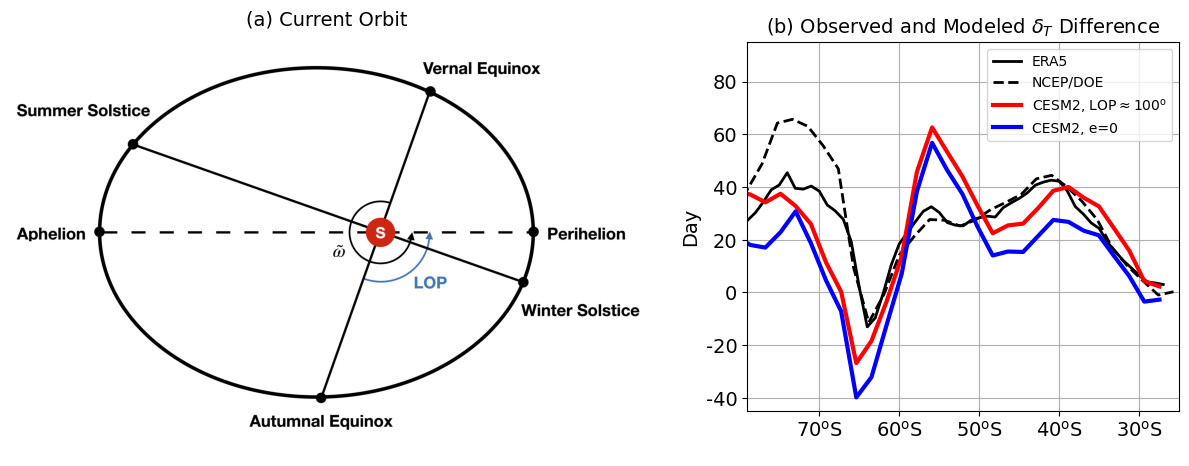

In [9]:
plt_pos=np.zeros((2,4))
plt_pos[0,:]=[-.03,-.02,.6,.94]
plt_pos[1,:]=[.62,.08,.36,.82]
LAT1=['$\mathrm{90^oS}$','$\mathrm{60^oS}$','$\mathrm{30^oS}$','EQ', \
     '$\mathrm{30^oN}$','$\mathrm{60^oN}$','$\mathrm{90^oN}$']
LAT2=['$\mathrm{90^oS}$','$\mathrm{80^oS}$','$\mathrm{70^oS}$', \
     '$\mathrm{60^oS}$','$\mathrm{50^oS}$','$\mathrm{40^oS}$', \
     '$\mathrm{30^oS}$','$\mathrm{20^oS}$']
title_str=['(a) Current Orbit', \
           '(b) Observed and Modeled $\delta_T$ Difference']

fig2 = plt.figure(figsize=[12,4.5])

ax1 = plt.axes(plt_pos[0,:])
plt.imshow(img1)
plt.axis('off')
plt.title(title_str[0],fontsize=14)

ax1 = plt.axes(plt_pos[1,:])
lns1 = plt.plot(lat2[-1:-65:-1],deltaT_era[-1:-65:-1,0]-deltaT_era[0:64,0], \
                c='k',lw=2,label='ERA5')
lns2 = plt.plot(lat3[-1:-35:-1],deltaT_ncep[-1:-35:-1,0]-deltaT_ncep[0:34,0], \
                c='k',ls='--',lw=2,label='NCEP/DOE')
lns3 = plt.plot(lat4[0:34],deltaT_cesm[0:34,0]-deltaT_cesm[-1:-35:-1,0], \
                c='r',lw=3,label=r'CESM2, LOP$\approx \mathrm{100^o}$')
lns4 = plt.plot(lat4[0:34],deltaT_cesm[0:34,1]-deltaT_cesm[-1:-35:-1,1], \
                c='b',lw=3,label='CESM2, e=0')
ax1.set_xticks(np.arange(-90,-10,10),LAT2,fontsize=14)
ax1.set_xlim(-79,-25)
ax1.set_yticks(np.arange(-200,200,20),np.arange(-200,200,20),fontsize=14)
ax1.set_ylim(-45,95)
ax1.set_ylabel('Day',fontsize=14)
lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax1.legend(lns,labs,loc=0)
ax1.grid()
plt.title(title_str[1],fontsize=14)

plt.show()
fig2.savefig('orbit.pdf',dpi=200)

# Figure 2

In [8]:
data = scio.loadmat('sol_rt_280_000_100.mat')
sa_amp = data['sa_amp']
lat1 = data['lat']

data = scio.loadmat('deltaT_zonal_ERA.mat')
deltaT_era = data['deltaT_era']
lat2 = data['lat']
data = scio.loadmat('deltaT_zonal_NCEP.mat')
deltaT_ncep = data['deltaT_ncep']
lat3 = data['lat']

data = scio.loadmat('deltaT_50_off_000.mat')
deltaT_50_off_000 = data['deltaT_50_off_000']
lat4 = data['lat']

data = scio.loadmat('deltaT_50_off_100.mat')
deltaT_50_off_100 = data['deltaT_50_off_100']

data = scio.loadmat('deltaT_50_off_280.mat')
deltaT_50_off_280 = data['deltaT_50_off_280']

data = scio.loadmat('deltaT_2_off_280.mat')
deltaT_2_off_280 = data['deltaT_2_off_280']

data = scio.loadmat('deltaT_2_10_280.mat')
deltaT_2_10_280 = data['deltaT_2_10_280']

data = scio.loadmat('deltaT_vary.mat')
deltaT_vary = data['deltaT_vary']
beta = data['beta0']
depth = data['depth0']

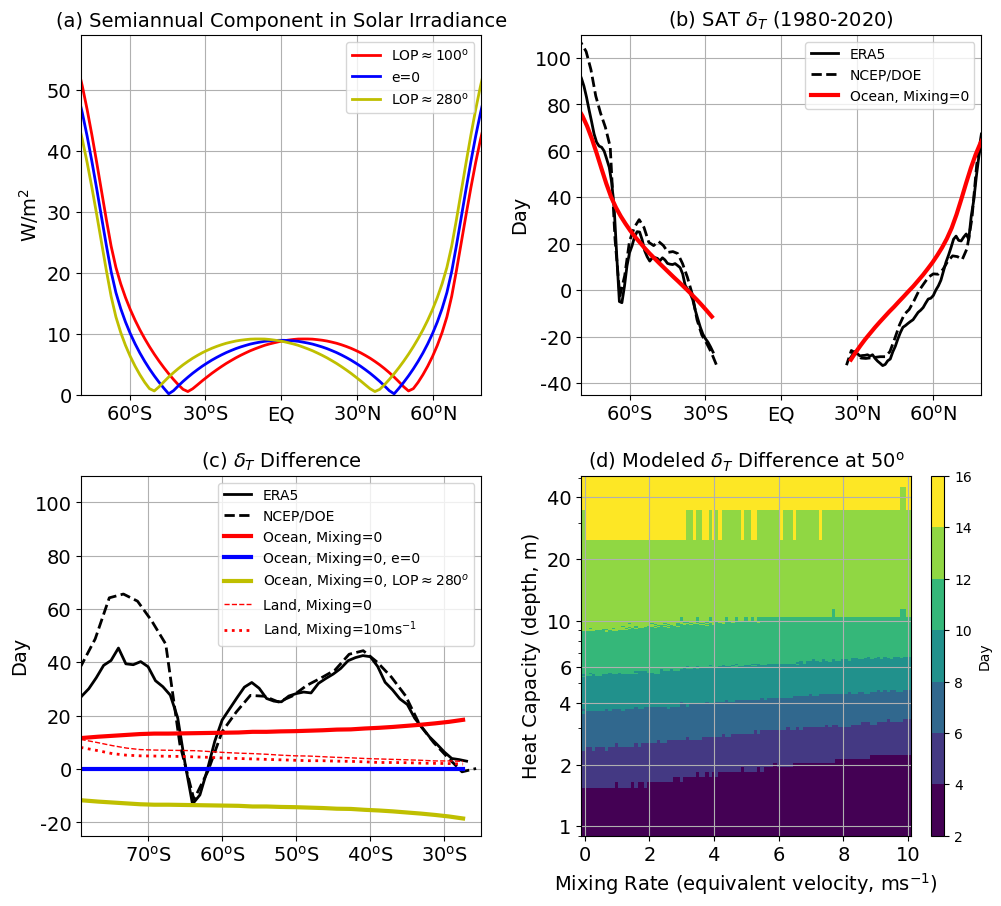

In [9]:
plt_pos=np.zeros((4,4))
plt_pos[0,:]=[.08,.56,.4,.4]
plt_pos[1,:]=[.58,.56,.4,.4]
plt_pos[2,:]=[.08,.07,.4,.4]
plt_pos[3,:]=[.58,.07,.33,.4]
LAT1=['$\mathrm{90^oS}$','$\mathrm{60^oS}$','$\mathrm{30^oS}$','EQ', \
     '$\mathrm{30^oN}$','$\mathrm{60^oN}$','$\mathrm{90^oN}$']
LAT2=['$\mathrm{90^oS}$','$\mathrm{80^oS}$','$\mathrm{70^oS}$', \
     '$\mathrm{60^oS}$','$\mathrm{50^oS}$','$\mathrm{40^oS}$', \
     '$\mathrm{30^oS}$','$\mathrm{20^oS}$']

fig2 = plt.figure(figsize=[10,9])

ax1 = plt.axes(plt_pos[0,:])
lns1 = plt.plot(lat1,sa_amp[:,0],c='r',lw=2,label=r'LOP$\approx \mathrm{100^o}$')
lns2 = plt.plot(lat1,sa_amp[:,1],c='b',lw=2,label='e=0')
lns3 = plt.plot(lat1,sa_amp[:,2],c='y',lw=2,label=r'LOP$\approx \mathrm{280^o}$')
ax1.set_xticks(np.arange(-90,91,30),LAT1,fontsize=14)
ax1.set_xlim(-79,79)
ax1.set_yticks(np.arange(-10,100,10),np.arange(-10,100,10),fontsize=14)
ax1.set_ylim(0,59)
ax1.set_ylabel('$\mathrm{W/m^2}$',fontsize=14)
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns,labs,loc=0)
ax1.grid()
plt.title('(a) Semiannual Component in Solar Irradiance',fontsize=14)

ax1 = plt.axes(plt_pos[1,:])
lns2 = plt.plot(lat3,deltaT_ncep[:,0],c='k',ls='--',lw=2,label='NCEP/DOE')
lns1 = plt.plot(lat2,deltaT_era[:,0],c='k',lw=2,label='ERA5')
lns3 = plt.plot(lat4,deltaT_50_off_280[:,0],c='r',lw=3,label='Ocean, Mixing=0')
ax1.set_xticks(np.arange(-90,91,30),LAT1,fontsize=14)
ax1.set_xlim(-79,79)
ax1.set_yticks(np.arange(-200,200,20),np.arange(-200,200,20),fontsize=14)
ax1.set_ylim(-45,110)
ax1.set_ylabel('Day',fontsize=14)
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns,labs,loc=0)
ax1.grid()
plt.title('(b) SAT $\delta_T$ (1980-2020)',fontsize=14)

ax1 = plt.axes(plt_pos[2,:])
lns0 = plt.plot(lat3[-1:-35:-1],deltaT_ncep[-1:-35:-1,0]-deltaT_ncep[0:34,0], \
                c='k',ls='--',lw=2,label='NCEP/DOE')
lns1 = plt.plot(lat2[-1:-65:-1],deltaT_era[-1:-65:-1,0]-deltaT_era[0:64,0], \
                c='k',lw=2,label='ERA5')
lns2 = plt.plot(lat4[0:34],deltaT_50_off_280[0:34,0]-deltaT_50_off_280[-1:-35:-1,0], \
                c='r',lw=3,label='Ocean, Mixing=0')
lns3 = plt.plot(lat4[0:34],deltaT_50_off_000[0:34,0]-deltaT_50_off_000[-1:-35:-1,0], \
                c='b',lw=3,label='Ocean, Mixing=0, e=0')
lns4 = plt.plot(lat4[0:34],deltaT_50_off_100[0:34,0]-deltaT_50_off_100[-1:-35:-1,0], \
                c='y',lw=3,label=r'Ocean, Mixing=0, LOP$\approx 280^o$')
lns5 = plt.plot(lat4[0:34],deltaT_2_off_280[0:34,0]-deltaT_2_off_280[-1:-35:-1,0], \
                c='r',ls='--',lw=1,label='Land, Mixing=0')
lns6 = plt.plot(lat4[0:34],deltaT_2_10_280[0:34,0]-deltaT_2_10_280[-1:-35:-1,0], \
                c='r',ls=':',lw=2,label='Land, Mixing=10$\mathrm{ms^{-1}}$')
ax1.set_xticks(np.arange(-90,-10,10),LAT2,fontsize=14)
ax1.set_xlim(-79,-25)
ax1.set_yticks(np.arange(-200,200,20),np.arange(-200,200,20),fontsize=14)
ax1.set_ylim(-25,110)
ax1.set_ylabel('Day',fontsize=14)
lns = lns1+lns0+lns2+lns3+lns4+lns5+lns6
labs = [l.get_label() for l in lns]
ax1.legend(lns,labs,loc=0)
ax1.grid()
plt.title('(c) $\delta_T$ Difference',fontsize=14)

ax1 = plt.axes(plt_pos[3,:])
lev1 = np.arange(2,18,2)
norm4 = mcolors.BoundaryNorm(lev1,len(lev1)-1)
cmap = plt.get_cmap('viridis',7)
colors_cool = cmap(np.arange(0,7,1))
colors_all = colors_cool
cmap_merged = mcolors.ListedColormap(colors_all)
cmap_merged.set_bad('white',1.)
X,Y = np.meshgrid(beta,depth)
cf1 = ax1.pcolor(X,Y,np.transpose(deltaT_vary[:,:,21]-deltaT_vary[:,:,74]), \
                 norm=norm4,cmap=cmap_merged)
ax1.set_xticks(np.arange(0,12,2),np.arange(0,12,2),fontsize=14)
ax1.set_xlim(-.1,10.1)
ax1.set_xlabel('Mixing Rate (equivalent velocity, $\mathrm{ms^{-1}}$)',fontsize=14)
ax1.set_yscale('log')
ax1.set_yticks([1,2,4,6,10,20,40],[1,2,4,6,10,20,40],fontsize=14)
ax1.set_ylim(.9,51)
ax1.set_ylabel('Heat Capacity (depth, m)',fontsize=14)
ax1.grid()
plt.title('(d) Modeled $\delta_T$ Difference at $\mathrm{50^o}$',fontsize=14)
clb_pos = fig2.add_axes([.93, .07, .013, .4])
cb = fig2.colorbar(cf1,cax=clb_pos, \
                   ticks=lev1,label='Day')

plt.show()
fig2.savefig('eccentricity.pdf',dpi=200)

In [7]:
sa_amp.shape

(96, 3)

# Figure 3

In [10]:
data = scio.loadmat('ex_sr.mat')
ex_sr = data['ex_sr']

data = scio.loadmat('full_50.mat')
TT_full50 = data['TT']
mm_full50 = data['mm']

data = scio.loadmat('full_2.mat')
TT_full2 = data['TT']
mm_full2 = data['mm']

data = scio.loadmat('seasonal_30N.mat')
TT_seasonal30 = data['TT']
DD_30 = data['DD']
mm_seasonal30 = data['mm']

data = scio.loadmat('seasonal_60S.mat')
TT_seasonal60 = data['TT']
DD_60 = data['DD']
mm_seasonal60 = data['mm']

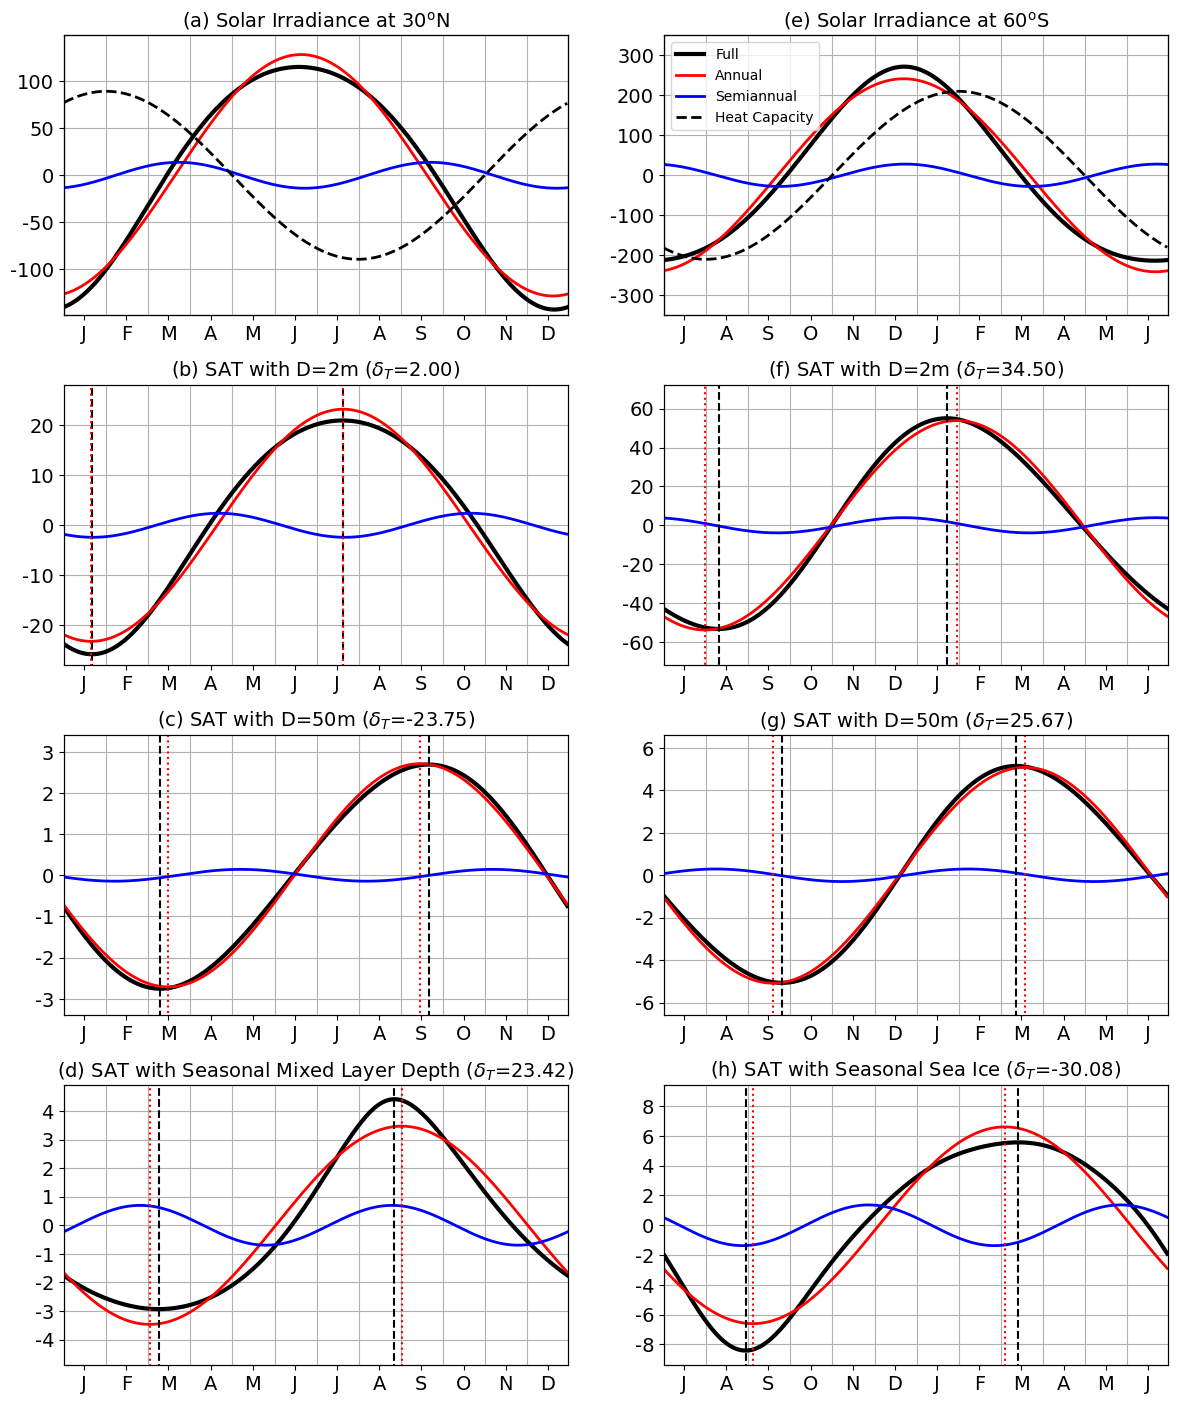

In [11]:
plt_pos=np.zeros((8,4))
plt_pos[0,:]=[.05,.78,.42,.2]
plt_pos[2,:]=[.05,.53,.42,.2]
plt_pos[1,:]=[.05,.28,.42,.2]
plt_pos[3,:]=[.05,.03,.42,.2]
plt_pos[4,:]=[.55,.78,.42,.2]
plt_pos[6,:]=[.55,.53,.42,.2]
plt_pos[5,:]=[.55,.28,.42,.2]
plt_pos[7,:]=[.55,.03,.42,.2]

title_str=['(a) Solar Irradiance at $\mathrm{30^oN}$', \
           '(c) SAT with D=50m ($\delta_T$='+"{:.2f}".format(mm_full50[0,2,0])+')', \
           '(b) SAT with D=2m ($\delta_T$='+"{:.2f}".format(mm_full2[0,2,0])+')', \
           '(d) SAT with Seasonal Mixed Layer Depth ($\delta_T$=' \
               +"{:.2f}".format(mm_seasonal30[0,2,0])+')', \
           '(e) Solar Irradiance at $\mathrm{60^oS}$', \
           '(g) SAT with D=50m ($\delta_T$='+"{:.2f}".format(mm_full50[1,2,0])+')', \
           '(f) SAT with D=2m ($\delta_T$='+"{:.2f}".format(mm_full2[1,2,0])+')', \
           '(h) SAT with Seasonal Sea Ice ($\delta_T$=' \
               +"{:.2f}".format(mm_seasonal60[0,2,0])+')']
month=['Jan','Feb','Mar','Apr','May','Jun', \
      'Jul','Aug','Sep','Oct','Nov','Dec']
month1=['J','F','M','A','M','J','J','A','S','O','N','D']
month2=['J','A','S','O','N','D','J','F','M','A','M','J']

fig2 = plt.figure(figsize=[12,14])

ax1 = plt.axes(plt_pos[0,:])
ax1.set_xticks(np.arange(15,365,30.5),month1,fontsize=14)
ax1.set_xlim(0.5,365)
ax1.set_yticks(np.arange(-200,250,50),np.arange(-200,250,50),fontsize=14)
ax1.set_ylim(-149,149)
ax1.grid(axis='y')
ax2 = ax1.twiny()
ax2.set_xticks(np.arange(0,365,30.5),[])
ax2.tick_params(top=False)
ax2.set_xlim(0,365)
ax2.grid()
ax3 = ax1.twinx()
ax3.set_yticks([])
ax3.set_ylim(0,100)
lns1 = ax2.plot(np.arange(.5,365,1),ex_sr[0,:,0],c='k',lw=3,label='Full')
lns2 = ax2.plot(np.arange(.5,365,1),ex_sr[0,:,1],c='r',lw=2,label='Annual')
lns3 = ax2.plot(np.arange(.5,365,1),ex_sr[0,:,2],c='b',lw=2,label='Semiannual')
lns4 = ax3.plot(np.arange(.5,365,1),DD_30[0,:],c='k',ls='--',lw=2,label='Heat Capacity')
plt.title(title_str[0],fontsize=14)

ax1 = plt.axes(plt_pos[1,:])
ax1.set_xticks(np.arange(15,365,30.5),month1,fontsize=14)
ax1.set_xlim(0.5,365)
ax1.set_yticks(np.arange(-10,10,1),np.arange(-10,10,1),fontsize=14)
ax1.set_ylim(-3.4,3.4)
ax1.grid(axis='y')
ax2 = ax1.twiny()
ax2.set_xticks(np.arange(0,365,30.5),[])
ax2.tick_params(top=False)
ax2.set_xlim(0,365)
ax2.grid()
lns1 = plt.plot(np.arange(.5,365,1),TT_full50[0,:,0],c='k',lw=3,label='Full')
lns2 = plt.plot(np.arange(.5,365,1),TT_full50[0,:,1],c='r',lw=2,label='Annual')
lns3 = plt.plot(np.arange(.5,365,1),TT_full50[0,:,2],c='b',lw=2,label='Semiannual')
plt.vlines(mm_full50[0,0:2,0],-100,100,color='k',ls='--',lw=1.5)
plt.vlines(mm_full50[0,0:2,1],-100,100,color='r',ls=':',lw=1.5)
plt.title(title_str[1],fontsize=14)

ax1 = plt.axes(plt_pos[2,:])
ax1.set_xticks(np.arange(15,365,30.5),month1,fontsize=14)
ax1.set_xlim(0.5,365)
ax1.set_yticks(np.arange(-100,100,10),np.arange(-100,100,10),fontsize=14)
ax1.set_ylim(-28,28)
ax1.grid(axis='y')
ax2 = ax1.twiny()
ax2.set_xticks(np.arange(0,365,30.5),[])
ax2.tick_params(top=False)
ax2.set_xlim(0,365)
ax2.grid()
lns1 = plt.plot(np.arange(.5,365,1),TT_full2[0,:,0],c='k',lw=3,label='Full')
lns2 = plt.plot(np.arange(.5,365,1),TT_full2[0,:,1],c='r',lw=2,label='Annual')
lns3 = plt.plot(np.arange(.5,365,1),TT_full2[0,:,2],c='b',lw=2,label='Semiannual')
plt.vlines(mm_full2[0,0:2,0],-100,100,color='k',ls='--',lw=1.5)
plt.vlines(mm_full2[0,0:2,1],-100,100,color='r',ls=':',lw=1.5)
plt.title(title_str[2],fontsize=14)

ax1 = plt.axes(plt_pos[3,:])
ax1.set_xticks(np.arange(15,365,30.5),month1,fontsize=14)
ax1.set_xlim(0.5,365)
ax1.set_yticks(np.arange(-10,10,1),np.arange(-10,10,1),fontsize=14)
ax1.set_ylim(-4.9,4.9)
ax1.grid(axis='y')
ax2 = ax1.twiny()
ax2.set_xticks(np.arange(0,365,30.5),[])
ax2.tick_params(top=False)
ax2.set_xlim(0,365)
ax2.grid()
lns1 = plt.plot(np.arange(.5,365,1),TT_seasonal30[0,:,0],c='k',lw=3,label='Full')
lns2 = plt.plot(np.arange(.5,365,1),TT_seasonal30[0,:,1],c='r',lw=2,label='Annual')
lns3 = plt.plot(np.arange(.5,365,1),TT_seasonal30[0,:,2],c='b',lw=2,label='Semiannual')
plt.vlines(mm_seasonal30[0,0:2,0],-100,100,color='k',ls='--',lw=1.5)
plt.vlines(mm_seasonal30[0,0:2,1],-100,100,color='r',ls=':',lw=1.5)
plt.title(title_str[3],fontsize=14)

ax1 = plt.axes(plt_pos[4,:])
ax1.set_xticks(np.arange(15,365,30.5),month2,fontsize=14)
ax1.set_xlim(0.5,365)
ax1.set_yticks(np.arange(-300,350,100),np.arange(-300,350,100),fontsize=14)
ax1.set_ylim(-350,350)
ax1.grid(axis='y')
ax2 = ax1.twiny()
ax2.set_xticks(np.arange(0,365,30.5),[])
ax2.tick_params(top=False)
ax2.set_xlim(0,365)
ax2.grid()
ax3 = ax1.twinx()
ax3.set_yticks([])
ax3.set_ylim(0,100)
lns1 = ax2.plot(np.arange(.5,365,1),ex_sr[1,:,0],c='k',lw=3,label='Full')
lns2 = ax2.plot(np.arange(.5,365,1),ex_sr[1,:,1],c='r',lw=2,label='Annual')
lns3 = ax2.plot(np.arange(.5,365,1),ex_sr[1,:,2],c='b',lw=2,label='Semiannual')
lns4 = ax3.plot(np.arange(.5,365,1),DD_60[0,:],c='k',ls='--',lw=2,label='Heat Capacity')
lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax3.legend(lns,labs,loc=2)
plt.title(title_str[4],fontsize=14)

ax1 = plt.axes(plt_pos[5,:])
ax1.set_xticks(np.arange(15,365,30.5),month2,fontsize=14)
ax1.set_xlim(0.5,365)
ax1.set_yticks(np.arange(-10,10,2),np.arange(-10,10,2),fontsize=14)
ax1.set_ylim(-6.6,6.6)
ax1.grid(axis='y')
ax2 = ax1.twiny()
ax2.set_xticks(np.arange(0,365,30.5),[])
ax2.tick_params(top=False)
ax2.set_xlim(0,365)
ax2.grid()
lns1 = plt.plot(np.arange(.5,365,1),TT_full50[1,:,0],c='k',lw=3,label='Full')
lns2 = plt.plot(np.arange(.5,365,1),TT_full50[1,:,1],c='r',lw=2,label='Annual')
lns3 = plt.plot(np.arange(.5,365,1),TT_full50[1,:,2],c='b',lw=2,label='Semiannual')
plt.vlines(mm_full50[1,0:2,0],-100,100,color='k',ls='--',lw=1.5)
plt.vlines(mm_full50[1,0:2,1],-100,100,color='r',ls=':',lw=1.5)
plt.title(title_str[5],fontsize=14)

ax1 = plt.axes(plt_pos[6,:])
ax1.set_xticks(np.arange(15,365,30.5),month2,fontsize=14)
ax1.set_xlim(0.5,365)
ax1.set_yticks(np.arange(-100,100,20),np.arange(-100,100,20),fontsize=14)
ax1.set_ylim(-72,72)
ax1.grid(axis='y')
ax2 = ax1.twiny()
ax2.set_xticks(np.arange(0,365,30.5),[])
ax2.tick_params(top=False)
ax2.set_xlim(0,365)
ax2.grid()
lns1 = plt.plot(np.arange(.5,365,1),TT_full2[1,:,0],c='k',lw=3,label='Full')
lns2 = plt.plot(np.arange(.5,365,1),TT_full2[1,:,1],c='r',lw=2,label='Annual')
lns3 = plt.plot(np.arange(.5,365,1),TT_full2[1,:,2],c='b',lw=2,label='Semiannual')
plt.vlines(mm_full2[1,0:2,0],-100,100,color='k',ls='--',lw=1.5)
plt.vlines(mm_full2[1,0:2,1],-100,100,color='r',ls=':',lw=1.5)
plt.title(title_str[6],fontsize=14)

ax1 = plt.axes(plt_pos[7,:])
ax1.set_xticks(np.arange(15,365,30.5),month2,fontsize=14)
ax1.set_xlim(0.5,365)
ax1.set_yticks(np.arange(-10,10,2),np.arange(-10,10,2),fontsize=14)
ax1.set_ylim(-9.4,9.4)
ax1.grid(axis='y')
ax2 = ax1.twiny()
ax2.set_xticks(np.arange(0,365,30.5),[])
ax2.tick_params(top=False)
ax2.set_xlim(0,365)
ax2.grid()
lns1 = plt.plot(np.arange(.5,365,1),TT_seasonal60[0,:,0],c='k',lw=3,label='Full')
lns2 = plt.plot(np.arange(.5,365,1),TT_seasonal60[0,:,1],c='r',lw=2,label='Annual')
lns3 = plt.plot(np.arange(.5,365,1),TT_seasonal60[0,:,2],c='b',lw=2,label='Semiannual')
plt.vlines(mm_seasonal60[0,0:2,0],-100,100,color='k',ls='--',lw=1.5)
plt.vlines(mm_seasonal60[0,0:2,1],-100,100,color='r',ls=':',lw=1.5)
plt.title(title_str[7],fontsize=14)

plt.show()
fig2.savefig('example_30_60.pdf',dpi=200)

# Figure 4

In [10]:
data = scio.loadmat('deltaT_5deg.mat')
deltaT_5deg = data['deltaT_5deg']
lon1 = data['lon']
lat1 = data['lat']

data = scio.loadmat('deltaT_region.mat')
deltaT_epo = data['deltaT_epo']
lat2 = data['lat']

data = scio.loadmat('deltaT_zonal_ERA.mat')
deltaT_era = data['deltaT_era']

data = scio.loadmat('ac_45.mat')
aa1 = data['aa1']
imax = data['imax']
imin = data['imin']

data = scio.loadmat('sic_std.mat')
sic_std = data['sic_std']
lat3 = data['lat']

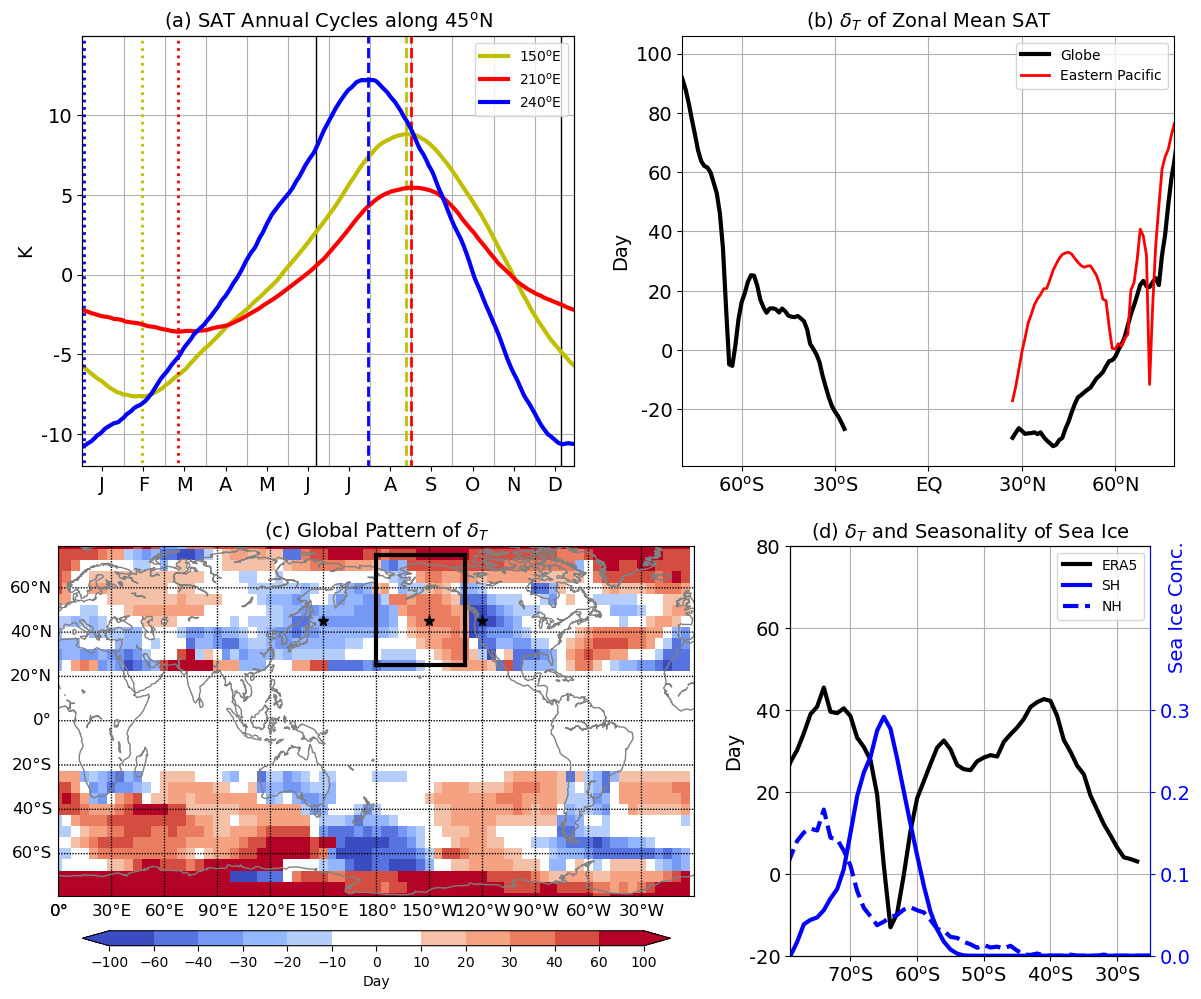

In [11]:
lev1 = [-100,-60,-40,-30,-20,-10,0,10,20,30,40,60,100]
norm4 = mcolors.BoundaryNorm(lev1,len(lev1)-1)
cmap = plt.get_cmap('coolwarm',12)
colors_cool = cmap(np.arange(0,12,1))
colors_all = np.vstack((colors_cool[0:5,:],[1.,1.,1.,1.],[1.,1.,1.,1.], \
                        colors_cool[7:12,:]))
cmap_merged = mcolors.ListedColormap(colors_all)
cmap_merged.set_bad('white',1.)
plt_pos=np.zeros((4,4))
plt_pos[0,:]=[.07,.53,.41,.43]
plt_pos[1,:]=[.57,.53,.41,.43]
plt_pos[2,:]=[.05,.1,.53,.35]
plt_pos[3,:]=[.66,.04,.3,.41]

title_str=['(a) SAT Annual Cycles along $\mathrm{45^oN}$', \
          '(b) $\delta_T$ of Zonal Mean SAT', \
          '(c) Global Pattern of $\delta_T$', \
          '(d) $\delta_T$ and Seasonality of Sea Ice']

LAT1=['$\mathrm{90^oS}$','$\mathrm{60^oS}$','$\mathrm{30^oS}$','EQ', \
     '$\mathrm{30^oN}$','$\mathrm{60^oN}$','$\mathrm{90^oN}$']
LAT2=['$\mathrm{90^oS}$','$\mathrm{80^oS}$','$\mathrm{70^oS}$', \
     '$\mathrm{60^oS}$','$\mathrm{50^oS}$','$\mathrm{40^oS}$', \
     '$\mathrm{30^oS}$','$\mathrm{20^oS}$']
month1=['J','F','M','A','M','J','J','A','S','O','N','D']

fig2 = plt.figure(figsize=[12,10])

ax1 = plt.axes(plt_pos[0,:])
ax1.set_xticks(np.arange(15,365,30.5),month1,fontsize=14)
ax1.set_xlim(0.5,365)
ax1.set_yticks(np.arange(-15,15,5),np.arange(-15,15,5),fontsize=14)
ax1.set_ylim(-12,15)
ax1.set_ylabel('K',fontsize=14)
ax1.grid(axis='y')
ax2 = ax1.twiny()
ax2.set_xticks(np.arange(0,365,30.5),[])
ax2.tick_params(top=False)
ax2.set_xlim(0,365)
ax2.grid()
plt.vlines(355,-100,100,color='k',ls='-',lw=1)
plt.vlines(173,-100,100,color='k',ls='-',lw=1)
lns1 = plt.plot(np.arange(1,366,1),aa1[0,:],c='y',lw=3,label='$\mathrm{150^oE}$')
plt.vlines(imax[0],-100,100,color='y',ls='--',lw=2)
plt.vlines(imin[0],-100,100,color='y',ls=':',lw=2)
lns2 = plt.plot(np.arange(1,366,1),aa1[1,:],c='r',lw=3,label='$\mathrm{210^oE}$')
plt.vlines(imax[1],-100,100,color='r',ls='--',lw=2)
plt.vlines(imin[1],-100,100,color='r',ls=':',lw=2)
lns3 = plt.plot(np.arange(1,366,1),aa1[2,:],c='b',lw=3,label='$\mathrm{240^oE}$')
plt.vlines(imax[2],-100,100,color='b',ls='--',lw=2)
plt.vlines(imin[2],-100,100,color='b',ls=':',lw=2)
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax2.legend(lns,labs,loc=0)
plt.title(title_str[0],fontsize=14)

ax1 = plt.axes(plt_pos[1,:])
lns1 = plt.plot(lat2,deltaT_era[:,0],c='k',lw=3,label='Globe')
lns2 = plt.plot(lat2[0:65],deltaT_epo[0:65,0],c='r',lw=2,label='Eastern Pacific')
ax1.set_xticks(np.arange(-90,91,30),LAT1,fontsize=14)
ax1.set_xlim(-79,79)
ax1.set_yticks(np.arange(-200,200,20),np.arange(-200,200,20),fontsize=14)
ax1.set_ylim(-39,106)
ax1.set_ylabel('Day',fontsize=14)
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns,labs,loc=0)
ax1.grid()
plt.title(title_str[1],fontsize=14)

ax1 = plt.axes(plt_pos[2,:])
as1 = bmp(llcrnrlon=0,llcrnrlat=-79,urcrnrlon=360,urcrnrlat=79,fix_aspect=False)
as1.drawparallels(np.arange(-80.,91.,20.),labels=[1,0,0,0],fontsize=12)
as1.drawmeridians(np.arange(-180.,181.,30.),labels=[0,0,0,1],fontsize=12)
as1.drawcoastlines(linewidth=1.0,color='grey')
extent = [lon1[0,0]-2.5,lon1[-1,0]+2.5,lat1[-1,0]-2.5,lat1[0,0]+2.5]
cf1 = ax1.imshow(np.transpose(deltaT_5deg),extent=extent, \
                 norm=norm4,cmap=cmap_merged,aspect='auto')
plt.plot([180,180],[25,75],c='k',lw=3)
plt.plot([230,230],[25,75],c='k',lw=3)
plt.plot([180,230],[25,25],c='k',lw=3)
plt.plot([180,230],[75,75],c='k',lw=3)
plt.plot([150,210,240],[45,45,45],'k*',ms=8)
plt.title(title_str[2],fontsize=14)
clb_pos = fig2.add_axes([.07,.05,.49,.015])
cb = fig2.colorbar(cf1,cax=clb_pos,orientation='horizontal', \
                   ticks=lev1,label='Day',extend='both')

ax1 = plt.axes(plt_pos[3,:])
lns1 = plt.plot(lat2[-1:-65:-1],deltaT_era[-1:-65:-1,0]-deltaT_era[0:64,0], \
                c='k',lw=3,label='ERA5')
ax1.set_xticks(np.arange(-90,-10,10),LAT2,fontsize=14)
ax1.set_xlim(-79,-25)
ax1.set_yticks(np.arange(-200,200,20),np.arange(-200,200,20),fontsize=14)
ax1.set_ylim(-20,80)
ax1.set_ylabel('Day',fontsize=14)
ax1.grid()
ax2 = ax1.twinx()
lns2 = plt.plot(lat3[-1:-90:-1],sic_std[-1:-90:-1,0], \
                c='b',lw=3,label='SH')
lns3 = plt.plot(lat3[-1:-90:-1],sic_std[0:89,0], \
                c='b',ls='--',lw=3,label='NH')
ax2.set_yticks(np.arange(0,4,1)/10,np.arange(0,4,1)/10,fontsize=14)
ax2.set_ylim(0,.5)
ax2.set_ylabel('Sea Ice Conc.',fontsize=14,color='b')
ax2.yaxis.set_label_coords(1.05,.85)
ax2.tick_params(axis='y',labelsize=14,labelcolor='b',color='b')
ax2.spines['right'].set_color('b')
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax2.legend(lns,labs,loc=0)
plt.title(title_str[3],fontsize=14)

plt.show()
fig2.savefig('asym_pattern.pdf',dpi=200)

# Figure S2

In [12]:
data = scio.loadmat('mass_flux.mat')
ms_n = data['ms_n']
ms_s = data['ms_s']
eq_n = data['eq_n']
eq_s = data['eq_s']
lat1 = data['lat']

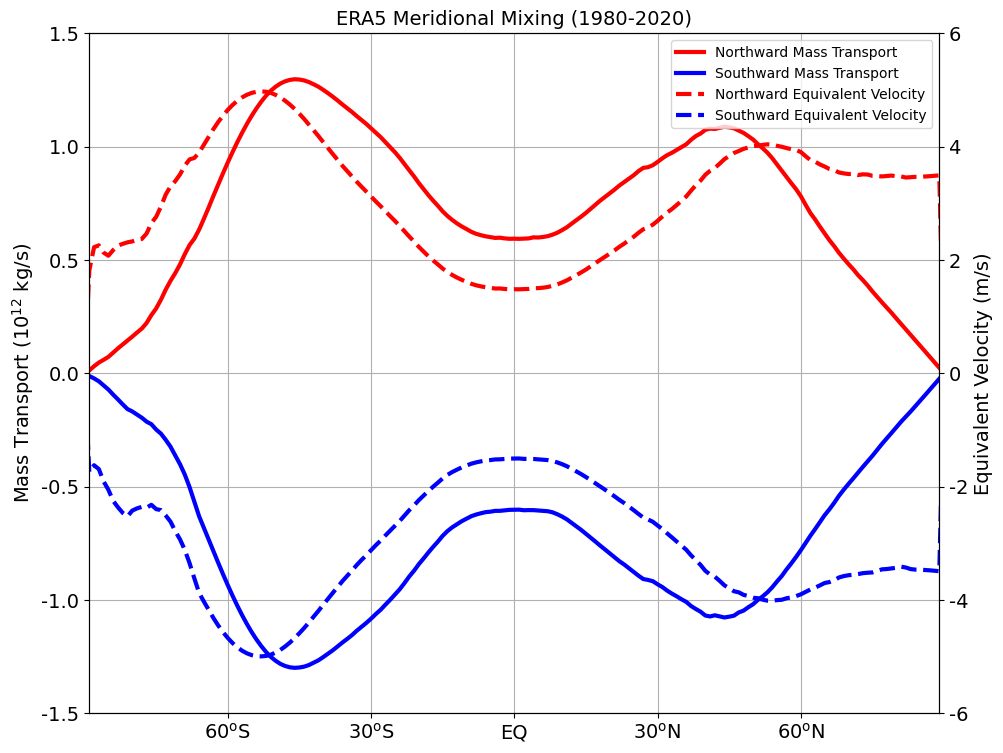

In [15]:
plt_pos=np.zeros((1,4))
plt_pos[0,:]=[.08,.08,.85,.85]

LAT1=['$\mathrm{90^oS}$','$\mathrm{60^oS}$','$\mathrm{30^oS}$','EQ', \
     '$\mathrm{30^oN}$','$\mathrm{60^oN}$','$\mathrm{90^oN}$']

fig2 = plt.figure(figsize=[10,8])

ax1 = plt.axes(plt_pos[0,:])
lns1 = plt.plot(lat1,ms_n/1e12,c='r',lw=3,label='Northward Mass Transport')
lns2 = plt.plot(lat1,ms_s/1e12,c='b',lw=3,label='Southward Mass Transport')
ax1.set_xticks(np.arange(-90,91,30),LAT1,fontsize=14)
ax1.set_xlim(-89,89)
ax1.set_yticks(np.arange(-10,10,1)/2,np.arange(-10,10,1)/2,fontsize=14)
ax1.set_ylim(-1.5,1.5)
ax1.set_ylabel('Mass Transport ($\mathrm{10^{12}}$ $\mathrm{kg/s}$)',fontsize=14)
ax1.grid()
ax2 = ax1.twinx()
lns3 = plt.plot(lat1,eq_n,c='r',ls='--',lw=3,label='Northward Equivalent Velocity')
lns4 = plt.plot(lat1,eq_s,c='b',ls='--',lw=3,label='Southward Equivalent Velocity')
ax2.set_yticks(np.arange(-10,10,2),np.arange(-10,10,2),fontsize=14)
ax2.set_ylim(-6,6)
ax2.set_ylabel('Equivalent Velocity (m/s)',fontsize=14)
ax1.grid()
lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax1.legend(lns,labs,loc=1)
ax1.grid()
plt.title('ERA5 Meridional Mixing (1980-2020)',fontsize=14)

plt.show()
fig2.savefig('mass_flux.pdf',dpi=200)

# Figure S3

In [16]:
data = scio.loadmat('sr_an_sm.mat')
sr_an_sm = data['sr_an_sm']
lat = data['lat0']
day = data['day']

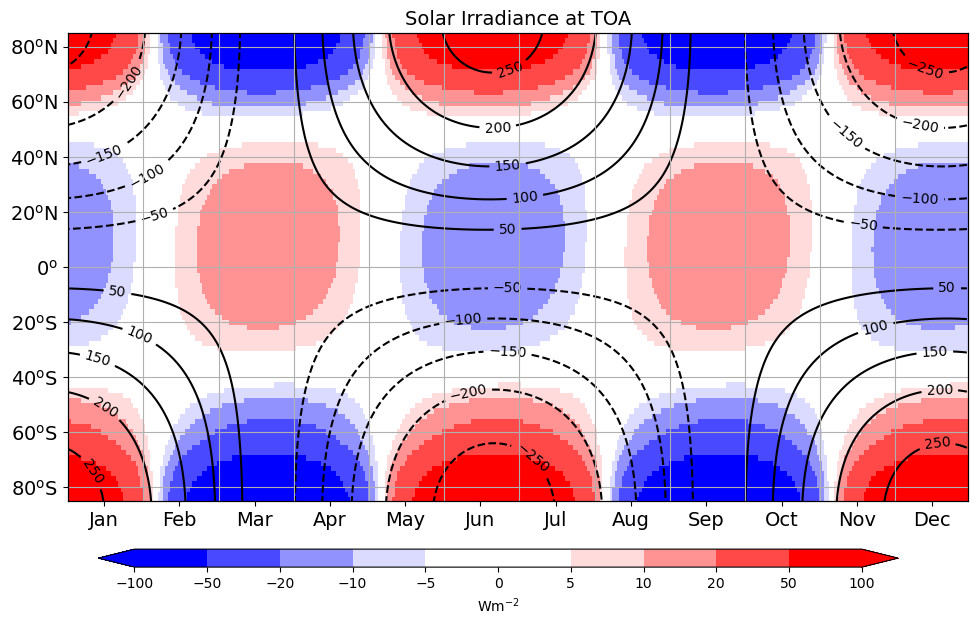

In [17]:
#lev1 = np.hstack((np.arange(-.8,-.1,.1),np.arange(.2,.9,.1)))
lev1 = [-100,-50,-20,-10,-5,0,5,10,20,50,100]
lev2 = [-250,-200,-150,-100,-50,50,100,150,200,250]
lev3 = [-250,-200,-150,-100,-50]
norm4 = mcolors.BoundaryNorm(lev1,len(lev1)-1)
cmap = plt.get_cmap('bwr',8)
colors_cool = cmap(np.arange(0,8,1))
colors_all = colors_cool
colors_all = np.vstack((colors_cool[0:4,:],[1.,1.,1.,1.],[1.,1.,1.,1.], \
                        colors_cool[4:8,:]))
cmap_merged = mcolors.ListedColormap(colors_all)
cmap_merged.set_bad('white',1.)
plt_pos=np.zeros((1,4))
plt_pos[0,:]=[.07,.18,.9,.78]
title_str=['Solar Irradiance at TOA']
ll=['$\mathrm{80^oS}$','$\mathrm{60^oS}$','$\mathrm{40^oS}$', \
    '$\mathrm{20^oS}$','$\mathrm{0^o}$','$\mathrm{20^oN}$', \
    '$\mathrm{40^oN}$','$\mathrm{60^oN}$','$\mathrm{80^oN}$']
month=['Jan','Feb','Mar','Apr','May','Jun', \
      'Jul','Aug','Sep','Oct','Nov','Dec']

fig2 = plt.figure(figsize=[10,6])

ax1 = plt.axes(plt_pos[0,:])
X,Y = np.meshgrid(day,lat)
cf1 = ax1.pcolor(X,Y,sr_an_sm[:,:,1],norm=norm4, \
                 cmap=cmap_merged)
X,Y = np.meshgrid((day[0:-1]+day[1:])/2,(lat[0:-1]+lat[1:])/2)
cf2 = ax1.contour(X,Y,sr_an_sm[:,:,0],levels=lev2,colors='k')
ax1.clabel(cf2,inline=True,fontsize=10)
ax1.set_xticks(np.arange(15,365,30.5),month,fontsize=14)
ax1.set_yticks(np.arange(-80,90,20),ll,fontsize=14)
ax1.set_xlim(0.5,365)
ax1.set_ylim(-85,85)
ax1.grid(axis='y')
ax2 = ax1.twiny()
ax2.set_xticks(np.arange(0,365,30.5),[])
ax2.tick_params(top=False)
ax2.set_xlim(0,365)
ax2.grid()
plt.title(title_str[0],fontsize=14)

clb_pos = fig2.add_axes([0.1,0.07,0.8,0.03])
cb = fig2.colorbar(cf1,cax=clb_pos,orientation='horizontal', \
                   extend='both',ticks=lev1,label='$\mathrm{Wm^{-2}}$')

plt.show()
fig2.savefig('example_asym.pdf',dpi=200)